In [285]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [66]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [286]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

In [294]:
#captura de dados
data = fetch_ucirepo(name='Abalone')
df = pd.DataFrame(data= data.data.original)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


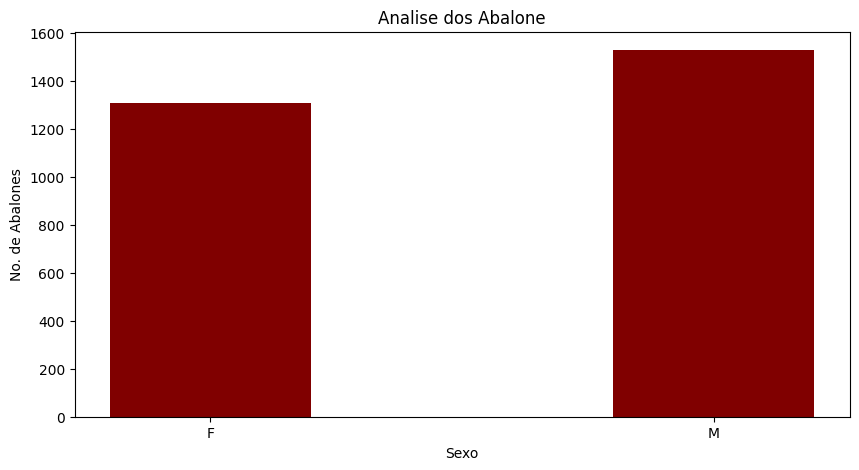

In [295]:
#imagem dos dois tipos de sexo
fig = plt.figure(figsize = (10, 5))
plt.bar(['F','M'],[len(df[df['Sex'] == 'F']), len(df[df['Sex'] == 'M']) ], color ='maroon',
        width = 0.4)
 
plt.xlabel("Sexo")
plt.ylabel("No. de Abalones")
plt.title("Analise dos Abalone")
plt.show()


In [291]:
#Criação de variáveis dummy para o Sexo
'''from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(df[['Sex']])

df_encoded = one_hot_encoder.transform(df[['Sex']])

df_encoded = pd.DataFrame(data=df_encoded, columns=one_hot_encoder.categories_)'''


In [190]:
'''horizontal_concat = pd.concat([df , df_encoded ], axis=1)
horizontal_concat = horizontal_concat.drop(['Sex'], axis= 1)'''

In [296]:
df = df.drop(['Sex'], axis= 1) 

In [297]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


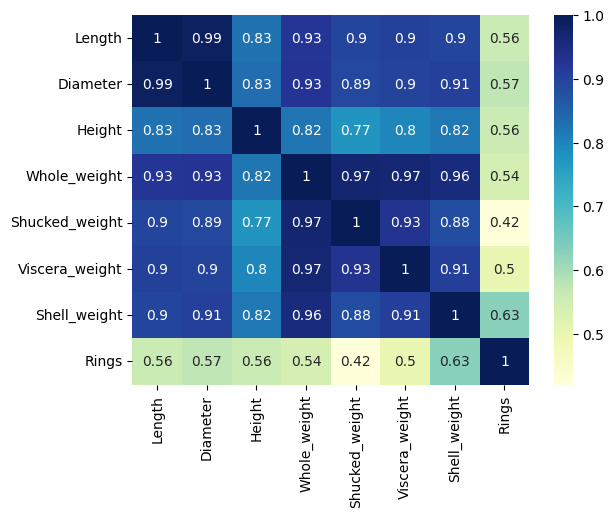

In [298]:
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 

dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  
mp.show() 

In [299]:
lista_de_valores = []
for i in range(len(df.corr())):
    valor = 0
    for j in range(len(df.corr().values[i])):
        if i != j:
            valor = valor + df.corr().values[i][j]
    lista_de_valores.append(valor/len(df.corr().values[i]))

In [300]:
correlacao = {'caracteristicas': df.columns.tolist(), 'correlacao': lista_de_valores}

In [301]:
df_correlacao = pd.DataFrame(correlacao)

In [302]:
df_correlacao = df_correlacao.sort_values(by='correlacao', ascending=False)

In [303]:
df_correlacao

,caracteristicas,correlacao
3,Whole_weight,0.762682
1,Diameter,0.752353
0,Length,0.749373
6,Shell_weight,0.749197
5,Viscera_weight,0.738859
4,Shucked_weight,0.721364
2,Height,0.678569
7,Rings,0.472689


In [304]:
df["Age"] = df["Rings"] + 1.5
df.drop("Rings", axis=1, inplace=True)

In [305]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [306]:

X = df.drop("Age", axis=1) 
y = df["Age"]

In [307]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=14) 

In [308]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [309]:

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [310]:
r_sq = lr.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.5230847764212943
